In [3]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Load the dataset
df = pd.read_csv('kingcountysales_2020_2023 (1).csv')
df

,sale_id,sale_date,sale_price,sale_nbr,latitude,longitude,city,zoning,subdivision,land_val,...,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft
0,2020..204,2020-01-05,411900,1.0,47.468289,-122.348669,BURIEN,R-6,DASHLEYS ADD NO. 02,50000,...,5,0,3,1.0,2,1,0,0,0,0
1,2020..532,2020-01-03,625000,NaN,47.704662,-122.319315,SEATTLE,SF 5000,MAPLE LEAF TO GREEN LAKE CIRCLE POR OF,80000,...,6,0,4,1.0,2,1,0,0,0,0
2,2020..643,2020-01-06,460000,2.0,47.403445,-122.296944,DES MOINES,RM1.8,EAST DES MOINES FIVE-ACRE TRACTS,25000,...,6,0,3,1.0,3,1,0,0,0,0
3,2020..1508,2020-01-15,930000,3.0,47.413624,-122.287447,SEA-TAC,RS15000,NaN,75000,...,6,0,3,1.0,3,1,0,0,0,0
4,2020..1681,2020-01-22,815000,NaN,47.708265,-122.308711,SEATTLE,SF 7200,VICTORY HEIGHTS ADD,61000,...,7,0,4,2.0,4,2,0,1,0,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72958,2023..26181,2023-12-20,595000,4.0,47.393370,-122.163013,KENT,SR-4.5,WILDWOOD ESTATES DIV NO. 01,172000,...,7,7,3,1.0,3,1,1,0,280,230
72959,2023..26200,2023-12-13,875000,4.0,47.571076,-122.372272,SEATTLE,NR3,SEABOARD ADD,332000,...,8,7,3,2.0,5,3,0,0,170,70
72960,2023..26205,2023-12-14,2025000,2.0,47.670817,-122.263081,SEATTLE,NR1,WINDERMERE,1307000,...,10,9,3,2.0,5,2,0,1,0,0
72961,2023..26232,2023-12-14,825000,4.0,47.500221,-122.172277,RENTON,R-8,BALCHS ALBERT PRESIDENT PARK NO. 12,294000,...,7,6,3,1.0,3,1,2,0,260,0


In [9]:
# Format sale_date to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])
# Extract year
df['year'] = df['sale_date'].dt.year

In [10]:
#Calculate the average price per year
avg_yearly_price = df.groupby('year')['sale_price'].mean().reset_index()

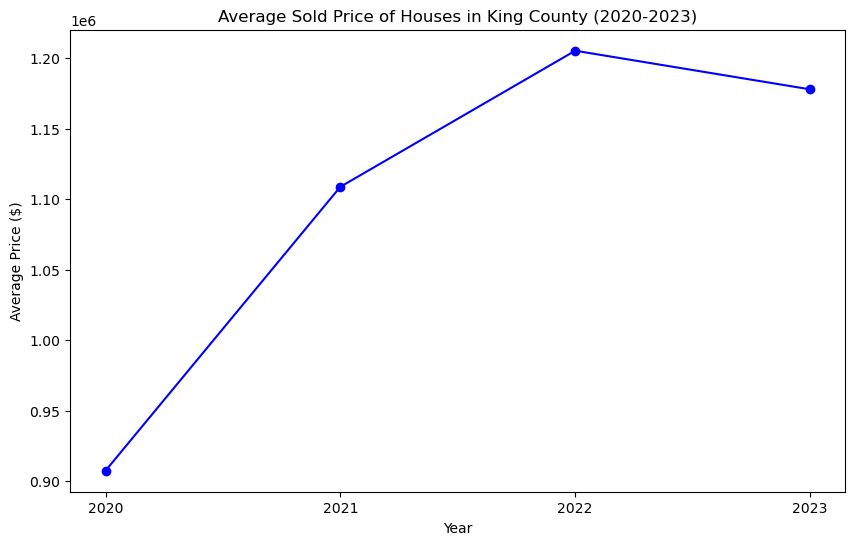

In [13]:
#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(avg_yearly_price['year'], avg_yearly_price['sale_price'], marker='o', color='blue', label='Average Sold Price')
plt.title('Average Sold Price of Houses in King County (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(avg_yearly_price['year'])
plt.savefig("Output/avg_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
#Filter the data for Waterfront properties
waterfront_df = df[df['waterfront'] == 1]
#Calculate the average price for Waterfront properties per year
avg_waterfront_price = waterfront_df.groupby('year')['sale_price'].mean().reset_index()

KeyError: 'waterfront'

In [ ]:
#Plot the Waterfront properties results
plt.figure(figsize=(10, 6))
plt.plot(avg_waterfront_price['year'], avg_waterfront_price['sale_price'], marker='o', color='green', label='Average Waterfront Price')
plt.title('Average Sold Price of Waterfront Houses in King County (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(avg_waterfront_price['year'])
plt.savefig("Output/avg_waterfront_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()